<a href="https://colab.research.google.com/github/dell-datascience/Inage_classifier/blob/main/old_He_evolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
'''
Definition
In this script i seek to mine from MMonCa logfile the  interstitial, vacancy,
 Helium and all generated versions of thier clusters.
I resorfted to this procedure due to the restricted nature in how MMonCa 
extracts defects.
The extract command requires an upfront definition of the defect or clusters to
extract.This can be determined only after simulation is completed.
Help [report defect] command, is used to output all defects in the simulation 
for every simulation epoch.

Here i mine the HenVm, HenIm (n>1,m>1 ) from each of the 10 simulation logfiles
The ratio of He trapped in interstitial, vacancies and their clusters are
 calculated and ploted against the time simulated. 
'''

import pandas as pd
import numpy as np
from os import listdir
import re
from matplotlib import text
import matplotlib.pyplot as plt
%matplotlib inline
import collections
import seaborn as sb
%config InlineBackend.figure_format = 'retina'
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/MyDrive/research/old_He_evolution' 
% ls-l

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/research/old_He_evolution
total 618
-rw------- 1 root root 478826 Jan 31 03:04 He_evolution.0.mc.log
-rw------- 1 root root 153063 Jan 31 15:22 He_insertion_anneal_tempevolution_flux.1.mc.log


In [17]:
#in this code i aim to extract the defect log from MMonCa logfile 
#and analyse the normalized free He atoms in simulation

files=list(listdir('/content/drive/MyDrive/research/old_He_evolution'))   
#Return a list containing the names of the files in the directory
def convert(str):
    return int("".join(re.findall("\d", str)))    #isolate the digits
files.sort(key=convert)
print(files)

def analyze(aa):
  dic={}                    #dictionary to hold values for each run
  mydata=[]                 #list to append data
  start,end=[],[]           #get the beginning and end of the lines for each run
  trap=0 
  total_trapped=[]
  num=200                 #number of run
  a=aa                    
  pka=files[a]
  data=open(pka,'rt')     #open the logfile as readtext
  for j in range(1,num,1):  #iterator to loop through logfile based on number of runs
    data=open(pka)                            #open the log file 
    for i,line in enumerate(data):            #loop logfile
      if line.startswith('{} start'.format(j)):     #select start line number 
        start.append(i)
      if line.startswith('{} end'.format(j)):       #select end line number 
        end.append(i)

  data=open(pka,'rt')                               #open the logfile as readtext
  for line in data:                                 #iterate over each line in data 
    mydata.append(line.rstrip())                    #append line from data to list
  for i in range(1,len(start)+1):                   #iterate over each run a 
    val=mydata[start[i-1]+7:end[i-1]]               #extract the defects from logfile
    dic[i]=dic.get(i,val)                           #add values to dictionary

  for epoch in range(1,len(dic)+1,1):               #iteration number
    for idx in range(0,len(dic[epoch])):            #for each iteration 
      if (re.findall('MobileParticle/He\s',dic[epoch][idx])): #if HenVn or HenIn or HeV or Hen 
        # print(re.findall('He.+',dic[epoch][idx]))      #checkpoint      # display epoch defects stats
        size=(re.findall('\S.+/He(\d)',dic[epoch][idx]))  #take He cluster size (Hen->n)
        try: size[0]                                       #if cluster size is empty
        except:size.append(1)                              #append 1 
        count=re.findall('/He.+(......\d)',dic[epoch][idx])    #take count
        size,count=int(size[0]),int(count[0])              #convert to int
        # print(size,count)                                #checkpoint #Number of He in Hen or HeI, count 
        trap+=size*count
    total_trapped.append(trap)
    trap=0                                                #reinitialize trap to zero to prevent cumulative add
  return total_trapped                                    #return total_trapped                     

['He_evolution.0.mc.log', 'He_insertion_anneal_tempevolution_flux.1.mc.log']


In [18]:
He=analyze(1)

# KeV_1=analyze(3)
# KeV_2=analyze(2)
# KeV_5=analyze(3)
# KeV_15=analyze(4)
# KeV_20=analyze(5)
# KeV_25=analyze(6)
# KeV_30=analyze(7)
# KeV_35=analyze(8)
# KeV_40=analyze(9)
trapped=[He]

/content/drive/MyDrive/research/graphs


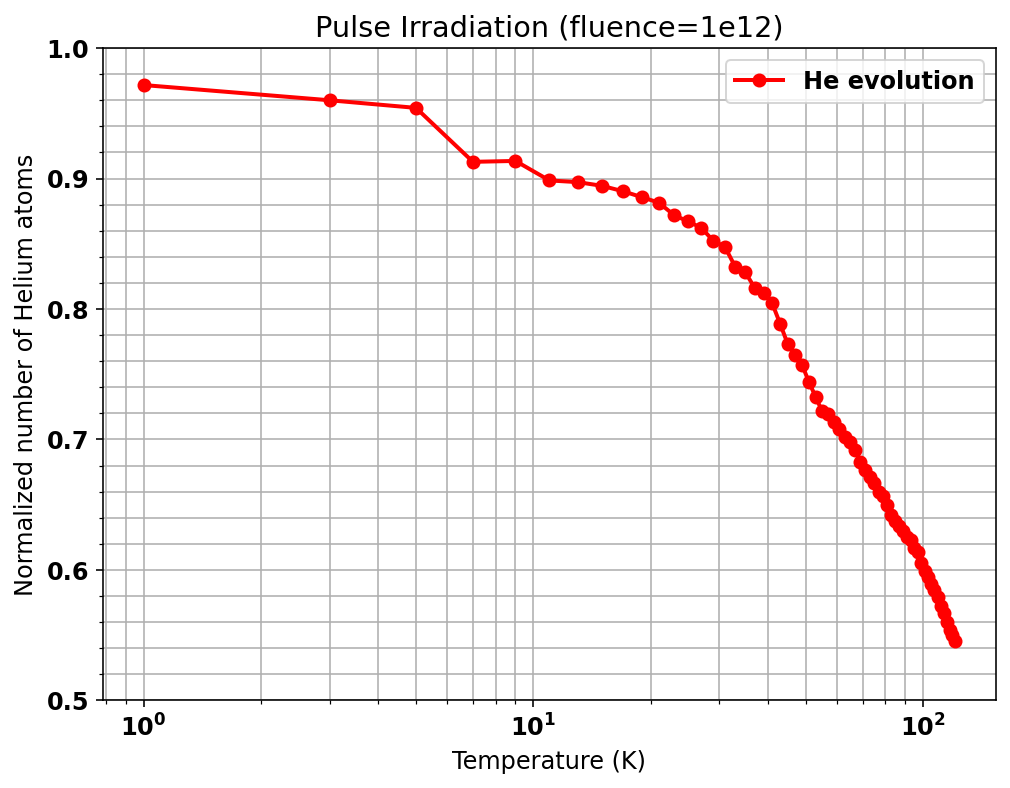

In [ ]:
%cd '/content/drive/MyDrive/research/graphs'

inserted=[x*2400 for x in np.arange(1,62)]

r1=np.divide(trapped[0],inserted)
# r2=np.divide(trapped[1],inserted)
# r5=np.divide(trapped[2],inserted)
# r10=np.divide(trapped[3],inserted)
# r15=np.divide(trapped[4],inserted)
# r20=np.divide(trapped[5],inserted)
# r25=np.divide(trapped[6],inserted)
# r30=np.divide(trapped[7],inserted)
# r35=np.divide(trapped[8],inserted)
# r40=np.divide(trapped[9],inserted)

time=np.arange(1,122,2)
plt.rcParams.update({'font.size': 12,'font.weight':'bold'})
fig, ax =plt.subplots(figsize=(8,6))
ax.minorticks_on()
ax.set_xscale("log")
plt.ylim([0.5,1])
ax.tick_params(axis='y', which='minor', bottom=True)

ax.plot(time,r1, linewidth=2, marker='o',label='He evolution',color='r');
ax.grid(which='both',axis='both')
# ax.plot(time,r2, linewidth=2, label='1KeV')
# ax.plot(time,r5, linewidth=2, label='2KeV')
# ax.plot(time,r10, linewidth=2, label='10KeV')
# ax.plot(time,r15, linewidth=2, label='15KeV')
# ax.plot(time,r20, linewidth=2, label='20KeV')
# ax.plot(time,r25, linewidth=2, label='25KeV')
# ax.plot(time,r30, linewidth=2, label='30KeV')
# ax.plot(time,r35, linewidth=2, label='35KeV')
# ax.plot(time,r40, linewidth=2, label='40keV')
ax.set_xlabel('Temperature (K)')
ax.set_ylabel('Normalized number of Helium atoms')
ax.set_title('Pulse Irradiation (fluence=1e12)');
ax.legend(facecolor ='white',loc='upper right',);
plt.savefig('He_evolution',dpi=2000)

***Stage two***

Plotting he cluster graphs

In [260]:
'''
This function is designed to plot the defects distribution at any epoch of the simulation
'''

files=list(listdir('/content/drive/MyDrive/research/old_He_evolution'))
def convert(str):
    return int("".join(re.findall("\d", str)))    
files.sort(key=convert)
files

def plotepoch(epoch):
  dic={}                    #dictionary to hold values for each run
  mydata=[]                 #list to append data
  start,end=[],[]           #get the beginning and end of the lines for each run
  trap=0 
  all_info=[]
  num=200                    #number of run
  a=1                        #specify file 
  pka=files[a]
  data=open(pka,'rt')     #open the logfile as readtext
  for j in range(2,num+1,1):  #iterator to loop through logfile based on number of runs
    data=open(pka)                            #open the log file 
    for i,line in enumerate(data):            #loop logfile
      if line.startswith('{} start'.format(j)):     #select start line number 
        start.append(i)
      if line.startswith('{} end'.format(j)):       #select end line number 
        end.append(i)

  data=open(pka,'rt')                               #open the logfile as readtext
  for line in data:                                 #iterate over each line in data 
    mydata.append(line.rstrip())                    #append line from data to list
  for i in range(1,len(start)+1):                   #iterate over each run a 
    val=mydata[start[i-1]+7:end[i-1]]               #extract the defects from logfile
    dic[i]=dic.get(i,val)                           #add values to dictionary

  epoch=epoch
  for idx in range(0,len(dic[epoch])):            #for each iteration 
    if (re.findall('He',dic[epoch][idx]) ):
        # or re.findall('He[A-Z]',dic[epoch][idx]) ): #if HenVn or HenIn or HeV or Hen 
      # print(re.findall('He.+',dic[epoch][idx]))      #checkpoint      # display epoch defects stats
      size=(re.findall('\S.+/He(\d)',dic[epoch][idx]))  #take He cluster size (Hen->n)
      try: size[0]                                       #if cluster size is empty
      except:size.append(1)                              #append 1 
      count=re.findall('/He.+(......\d)',dic[epoch][idx])    #take count
      name=((dic[epoch][idx]).split('  ')[0]).split('/')[1]
      # size,count=int(size[0]),int(count[0])
      size_count_name=int(size[0]),int(count[0]),name             #convert to int
      # print(size_count_name)                               #checkpoint #Number of He in Hen or HeI, count 
      all_info.append(size_count_name)
  return all_info                   

In [263]:
all_info=plotepoch(47)
all_info.sort(key=lambda y: y[0])
all_info

[(1, 71029, 'He'),
 (2, 15117, 'He2'),
 (3, 3256, 'He3'),
 (4, 750, 'He4'),
 (5, 160, 'He5'),
 (6, 48, 'He6'),
 (7, 8, 'He7'),
 (8, 2, 'He8'),
 (9, 1, 'He9')]

/content/drive/MyDrive/research/graphs


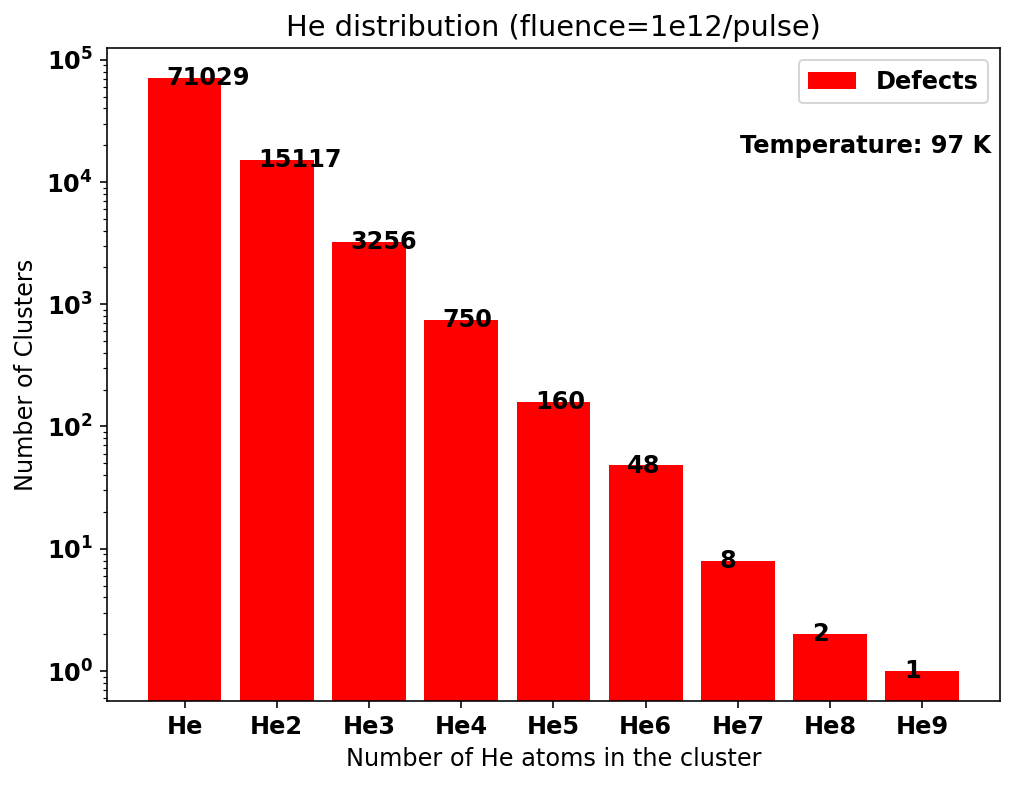

In [265]:
cluster_size=[int(x) for x,y,z in all_info]                             # list of cluster size
x=range(1,len(cluster_size)+1)                                          # get range of numbers to plot x-axis
cluster_count=[int(y) for x,y,z in all_info]                            # list of of cluster counts
cluster_name=[z for x,y,z in all_info]                                  # list of cluster names
plt.rcParams.update({'font.size': 12,'font.weight':'bold'})             # bolden scales and labels
fig, ax =plt.subplots(figsize=(8,6))                                    # define canvas size 
ax.set_yscale("log")                                                    # set y-axis to log scale to expose different scale brackets
ax.bar(x,cluster_count,color='r',label='Defects')                                       # Plot 
# ax.grid(which='Major',axis='both')                                      #show major gridlines
# set the ticks and labels
ax.set_xticks(x)                                                        # replace x_ticks with cluster names 
_ = ax.set_xticklabels(cluster_name)                                    # replace x_ticks with cluster names

for i in range(1,len(all_info)+1):                                      # display the bar values ontop of bar
  plt.text(i-0.2,all_info[i-1][1], str(all_info[i-1][1]),va='center')

ax.text(0.85, 0.85,'Temperature: 97 K', ha='center', va='center', transform=ax.transAxes)
ax.set_xlabel('Number of He atoms in the cluster');
ax.set_ylabel('Number of Clusters');
ax.set_title('He distribution (fluence=1e12/pulse)');
ax.legend(facecolor ='white',loc='upper right');
%cd '/content/drive/MyDrive/research/graphs'
plt.savefig('He_distribution_97K',dpi=2000)